In [ ]:
print("Hello")

Hello


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/test.csv'

data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its summary information
data_head = data.head()
data_info = data.info()
data.describe(), data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

(       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
 count           42502.000000       50000.000000     50000.000000   
 mean             4182.004291          16.838260        22.921480   
 std              3174.109304         116.396848       129.314804   
 min               303.645417          -1.000000         0.000000   
 25%              1625.188333           3.000000         4.000000   
 50%              3086.305000           6.000000         5.000000   
 75%              5934.189094           7.000000         7.000000   
 max             15204.633333        1798.000000      1499.000000   
 
        Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
 count   50000.000000         50000.000000          48965.000000   
 mean       68.772640            21.052640             30.080200   
 std       451.602363            14.860397            196.984121   
 min         1.000000            -5.000000              0.000000   
 25%         8.000000            10.0

In [ ]:
# Convert 'Month' to datetime format
data['Month'] = pd.to_datetime(data['Month'], format='%B', errors='coerce')

# Convert other potential numerical columns from object to float
# Attempting conversion; if fail, it will ignore conversion and print an error message
numerical_columns = ['Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

for col in numerical_columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except Exception as e:
        print(f"Error converting {col}: {e}")

# Show the data types to verify conversions and then handle missing values
data.dtypes, data.isnull().sum()


(ID                                  object
 Customer_ID                         object
 Month                       datetime64[ns]
 Name                                object
 Age                                 object
 SSN                                 object
 Occupation                          object
 Annual_Income                      float64
 Monthly_Inhand_Salary              float64
 Num_Bank_Accounts                    int64
 Num_Credit_Card                      int64
 Interest_Rate                        int64
 Num_of_Loan                         object
 Type_of_Loan                        object
 Delay_from_due_date                  int64
 Num_of_Delayed_Payment              object
 Changed_Credit_Limit                object
 Num_Credit_Inquiries               float64
 Credit_Mix                          object
 Outstanding_Debt                   float64
 Credit_Utilization_Ratio           float64
 Credit_History_Age                  object
 Payment_of_Min_Amount          

In [ ]:
# Interpolate the missing values for continuous financial metrics
data['Monthly_Inhand_Salary'].interpolate(method='linear', inplace=True)
data['Amount_invested_monthly'].interpolate(method='linear', inplace=True)
data['Monthly_Balance'].interpolate(method='linear', inplace=True)

# Fill the missing values for 'Annual_Income' and 'Outstanding_Debt' with median
data['Annual_Income'].fillna(data['Annual_Income'].median(), inplace=True)
data['Outstanding_Debt'].fillna(data['Outstanding_Debt'].median(), inplace=True)

# Recheck missing values to ensure filling was successful
data.isnull().sum()


ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64

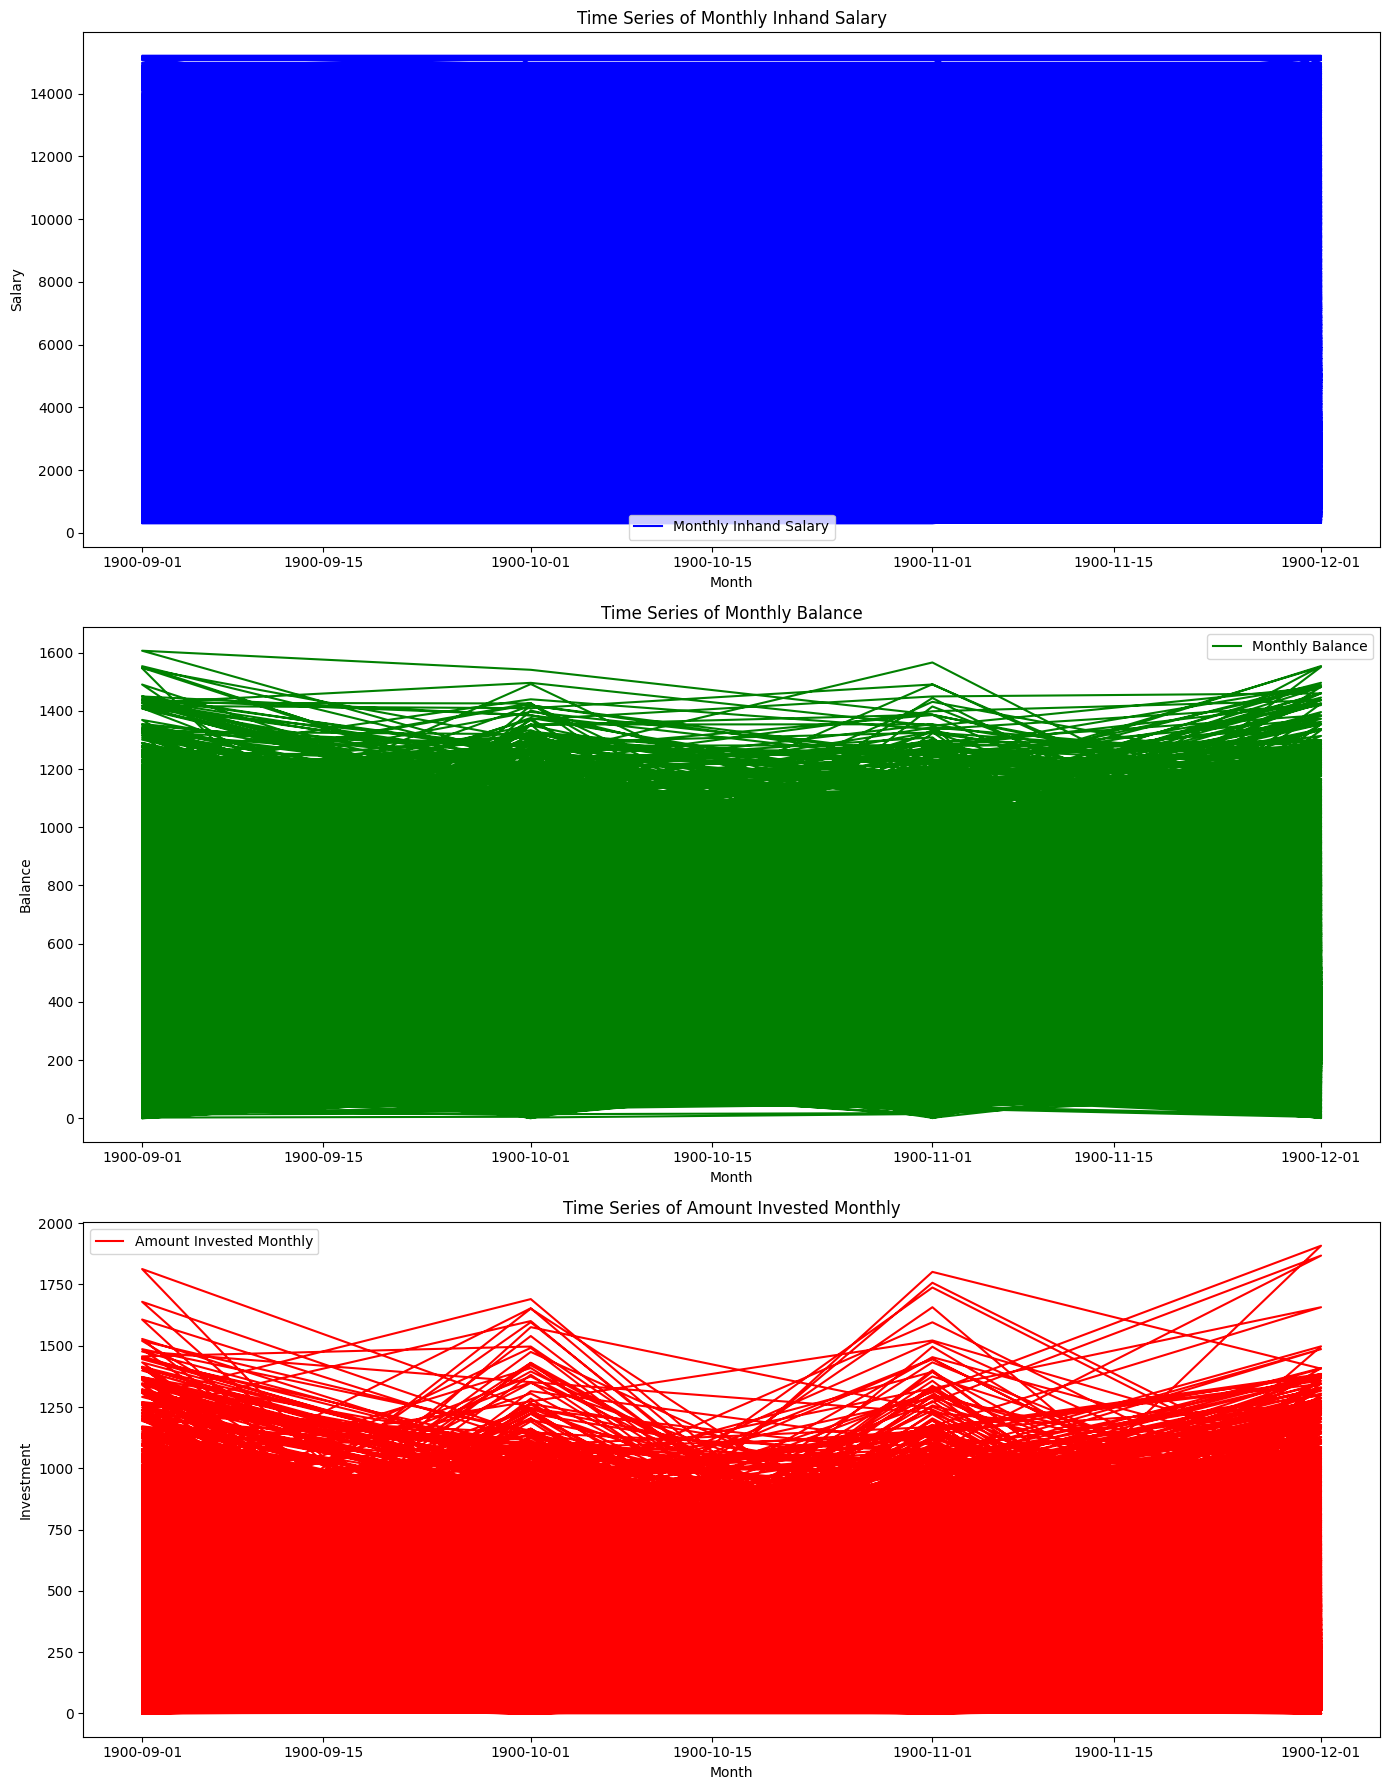

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure and axes for multiple plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 18))

# Time Series Plot for Monthly_Inhand_Salary
axes[0].plot(data['Month'], data['Monthly_Inhand_Salary'], label='Monthly Inhand Salary', color='blue')
axes[0].set_title('Time Series of Monthly Inhand Salary')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Salary')
axes[0].legend()

# Time Series Plot for Monthly_Balance
axes[1].plot(data['Month'], data['Monthly_Balance'], label='Monthly Balance', color='green')
axes[1].set_title('Time Series of Monthly Balance')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Balance')
axes[1].legend()

# Time Series Plot for Amount_invested_monthly
axes[2].plot(data['Month'], data['Amount_invested_monthly'], label='Amount Invested Monthly', color='red')
axes[2].set_title('Time Series of Amount Invested Monthly')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Investment')
axes[2].legend()

plt.tight_layout()
plt.show()


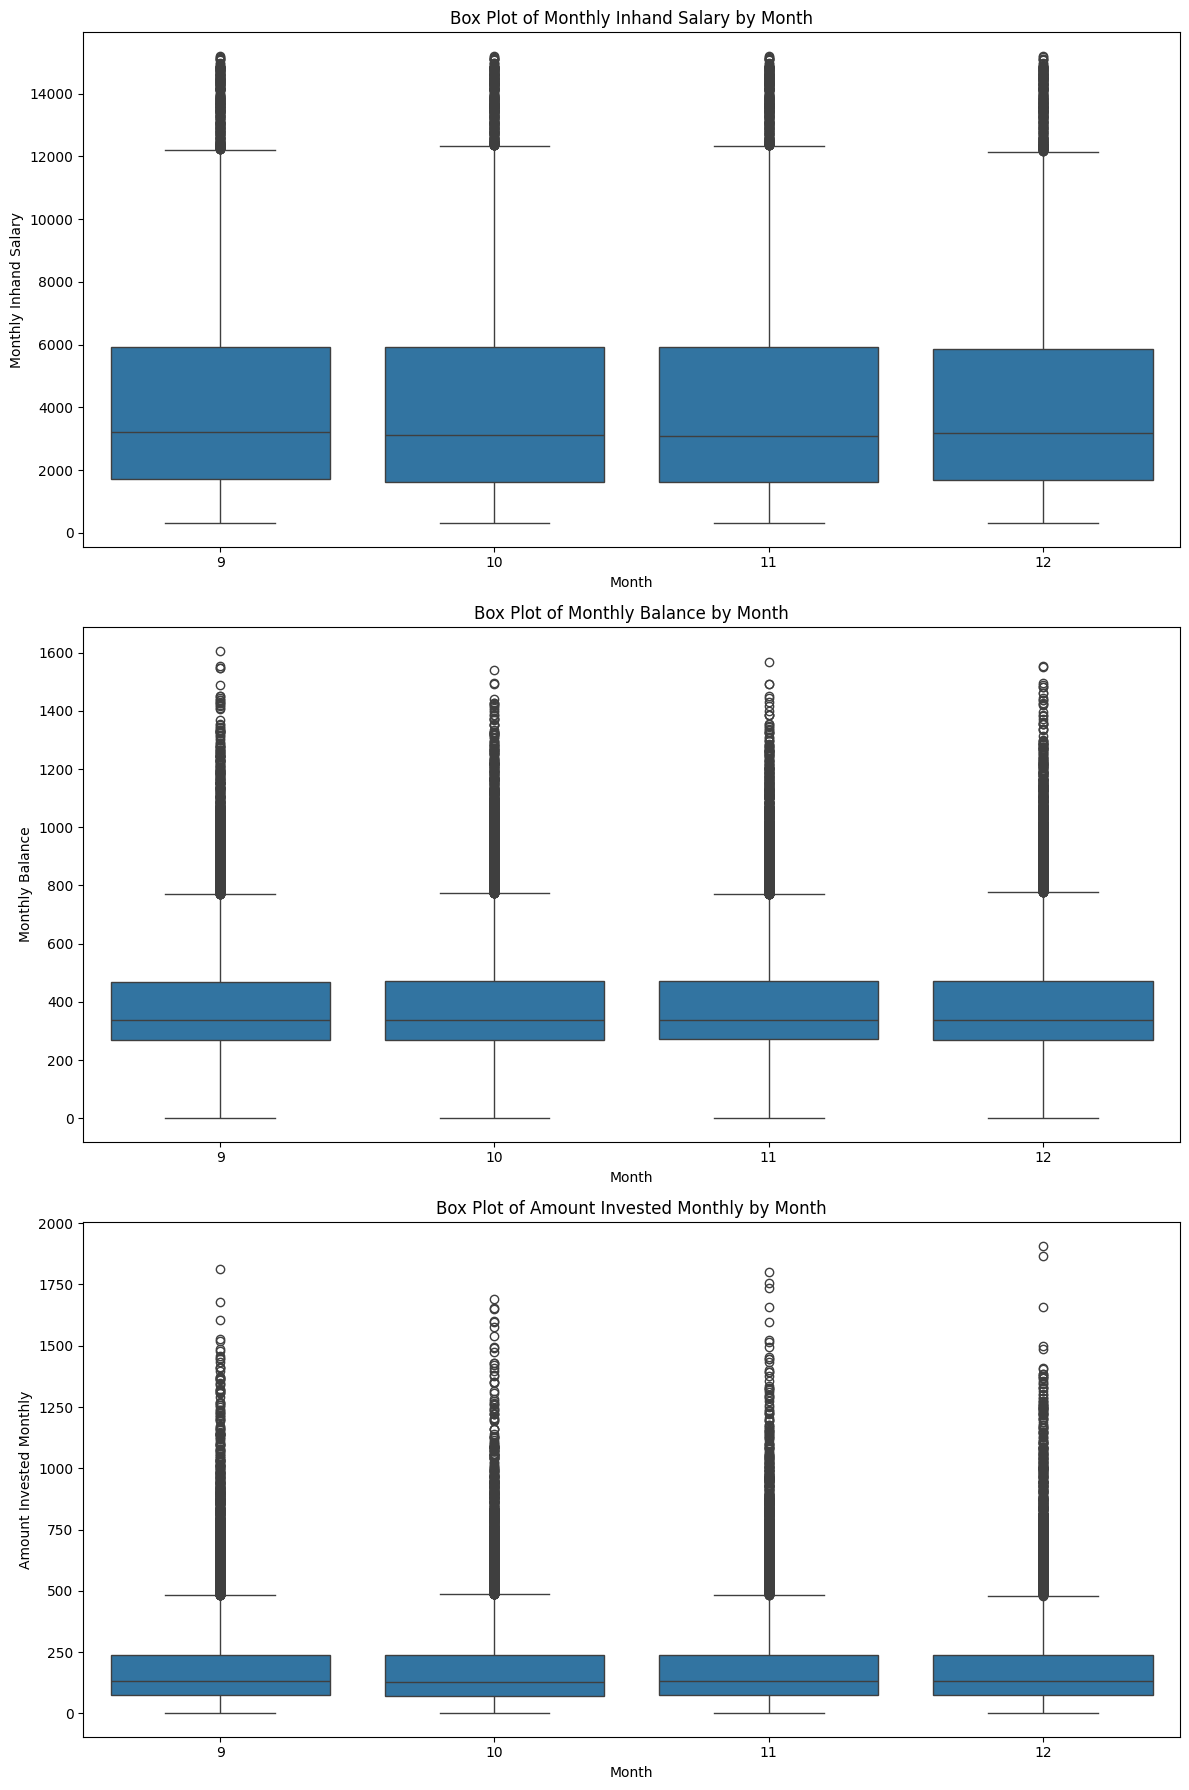

In [ ]:
# Extract year and month from 'Month' for grouping
data['Year'] = data['Month'].dt.year
data['Month_only'] = data['Month'].dt.month

# Setting up the figure and axes for box plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Box Plot for Monthly_Inhand_Salary
sns.boxplot(x='Month_only', y='Monthly_Inhand_Salary', data=data, ax=axes[0])
axes[0].set_title('Box Plot of Monthly Inhand Salary by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Monthly Inhand Salary')

# Box Plot for Monthly_Balance
sns.boxplot(x='Month_only', y='Monthly_Balance', data=data, ax=axes[1])
axes[1].set_title('Box Plot of Monthly Balance by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Monthly Balance')

# Box Plot for Amount_invested_monthly
sns.boxplot(x='Month_only', y='Amount_invested_monthly', data=data, ax=axes[2])
axes[2].set_title('Box Plot of Amount Invested Monthly by Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Amount Invested Monthly')

plt.tight_layout()
plt.show()


Results of Dickey-Fuller Test:
ADF Statistic: -43.735448
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567

Results of KPSS Test:
KPSS Statistic: 0.168133
p-value: 0.100000
Lags Used: 52
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-11-a59f747a8f27>:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(timeseries.dropna(), regression='c')


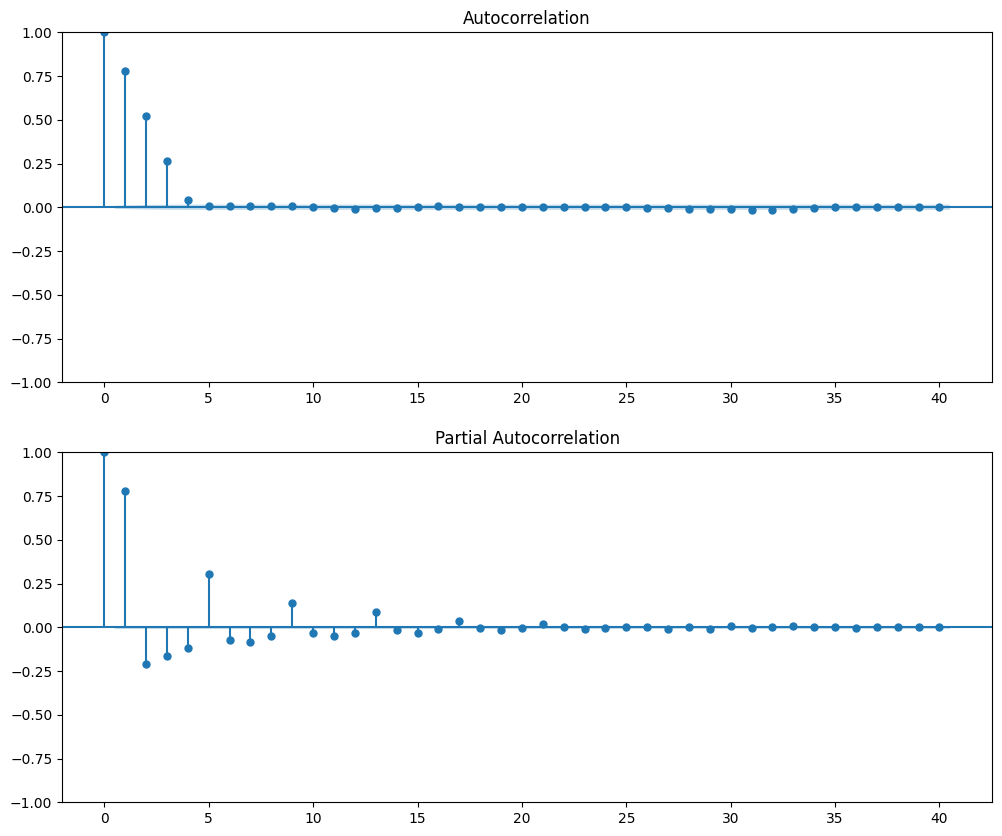

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to perform the Augmented Dickey-Fuller test
def adf_test(timeseries):
    result = adfuller(timeseries.dropna(), autolag='AIC')  # dropna() handles missing values
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Function to perform the KPSS test
def kpss_test(timeseries):
    statistic, p_value, n_lags, critical_values = kpss(timeseries.dropna(), regression='c')
    print('KPSS Statistic: %f' % statistic)
    print('p-value: %f' % p_value)
    print('Lags Used: %d' % n_lags)
    print('Critical Values:')
    for key, value in critical_values.items():
        print('\t%s: %.3f' % (key, value))

# Performing ADF test on Monthly_Inhand_Salary
print("Results of Dickey-Fuller Test:")
adf_test(data['Monthly_Inhand_Salary'])

# Performing KPSS test on Monthly_Inhand_Salary
print("\nResults of KPSS Test:")
kpss_test(data['Monthly_Inhand_Salary'])

# Plotting ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plot_acf(data['Monthly_Inhand_Salary'].dropna(), lags=40, ax=ax1)
plot_pacf(data['Monthly_Inhand_Salary'].dropna(), lags=40, ax=ax2)
plt.show()


                                 SARIMAX Results                                 
Dep. Variable:     Monthly_Inhand_Salary   No. Observations:                40000
Model:                    ARIMA(1, 0, 1)   Log Likelihood             -359402.306
Date:                   Thu, 09 May 2024   AIC                         718812.611
Time:                           09:08:32   BIC                         718846.998
Sample:                                0   HQIC                        718823.496
                                 - 40000                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4183.3766     50.855     82.261      0.000    4083.702    4283.051
ar.L1          0.6984      0.005    131.378      0.000       0.688       0.709
ma.L1          0.2078      0

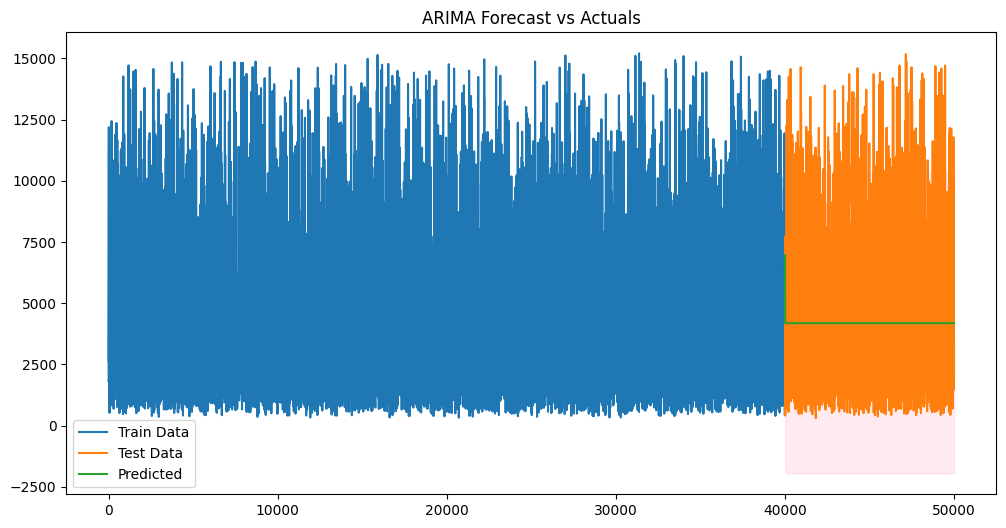

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming 'data' is your DataFrame and 'Monthly_Balance' is already confirmed to be stationary

# Splitting the data into train and test sets
train_data = data['Monthly_Inhand_Salary'][:int(0.8 * len(data))]
test_data = data['Monthly_Inhand_Salary'][int(0.8 * len(data)):]

# Fit the ARIMA model (Example parameters, should be determined based on ACF, PACF plots, and grid search)
model = ARIMA(train_data, order=(1,0,1))  # Adjust these parameters as per your model selection process
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting
forecast = model_fit.get_forecast(steps=len(test_data))
forecast_df = forecast.summary_frame()

# Plotting the forecast against actuals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(forecast_df.index, forecast_df['mean'], label='Predicted')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('ARIMA Forecast vs Actuals')
plt.legend()
plt.show()
